# Evaluation

## Results

#### Auto-Mode
Nutzt eine Heuristic, eine SInE Strategy und eine Selection Function
#### Satauto-Mode
Nutzt eine Heuristic und eine Selection Function
#### Filter-after-Union
Wendet einen SInE Filter mit b=5 und k=3 nach dem Union Select mit dem Goal als Seed auf die von Union Select gewählte Menge an
#### Merge-Filter
Wendet mehrer SInE Filter mit den von Union Select gewählten Goals auf admine.sumo an und merged die Ergebnisse.  
b=5 bedeutet folgende SInE Strategien: b=5 & k=1, b=4 & k=2, ... , b=1 & k=5

### Importe

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

### Ergebnisse

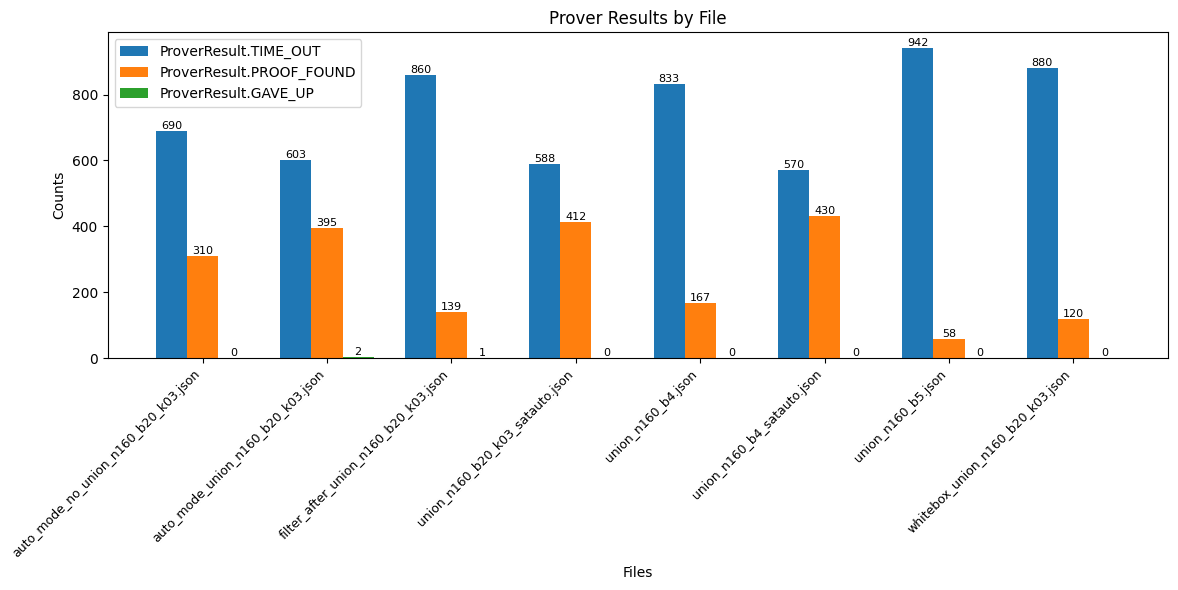

In [3]:
with open('./summary.json', 'r') as file:
    data = json.load(file)
    
# Result categories
categories = ["ProverResult.TIME_OUT", "ProverResult.PROOF_FOUND", "ProverResult.GAVE_UP"]

# Extract data for plotting
files = list(data.keys())
n_files = len(files)
n_categories = len(categories)

# Initialize an array for category counts
category_counts = np.zeros((n_files, n_categories), dtype=int)

# Fill the category counts
for i, (file, results) in enumerate(data.items()):
    for j, category in enumerate(categories):
        # Get the count for each category, defaulting to 0 if not present
        category_counts[i, j] = results.get(category, 0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
index = np.arange(n_files)

# Plot a bar for each category
bars = []
for j, category in enumerate(categories):
    bars.append(ax.bar(index + j * bar_width, category_counts[:, j], bar_width, label=category))

# Add labels, legend, and title
ax.set_xlabel('Files')
ax.set_ylabel('Counts')
ax.set_title('Prover Results by File')
ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
ax.set_xticklabels(files, rotation=45, ha='right', fontsize=9)
ax.legend()

# Add count labels above the bars
for bar_group in bars:
    for bar in bar_group:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

# Adjust layout to ensure labels fit
plt.tight_layout()

# Display the plot
plt.show()

#### Erkenntnisse
Die Anwendung von Union erzielt in Kombination mit satauto bessere Ergebnisse, als der auto-Modus von E.  
Die Verknüpfung von mehreren SInE Strategien in Kombination mit satauto erzielt das beste Ergebnis.

### Anzahl der Variablen wenn Proof Found und gesamt

In [4]:
def counts(file_path: str):
    with open(file_path) as f:
        data = json.load(f)

    # Prepare a list to store the means for each JSON file
    means = []

    # Iterate over each JSON dataset
    for file_name, counts in data.items():
        # Calculate the mean of variable counts
        variable_counts = list(counts.values())
        mean_variable_count = sum(variable_counts) / len(variable_counts)
        means.append((file_name, mean_variable_count))

    # Convert to a DataFrame for plotting
    df_means = pd.DataFrame(means, columns=['File', 'MeanVariableCount'])

    # Plot the data
    plt.figure(figsize=(12, 6))
    bars = plt.barh(df_means['File'], df_means['MeanVariableCount'], color='skyblue')
    plt.xlabel('Mean Variable Count')
    plt.title('Mean Variable Count per JSON File')
    plt.tight_layout()

    # Add text annotations (mean values) above the bars
    for bar in bars:
        plt.text(
            bar.get_width(),         # x-coordinate, right at the end of each bar
            bar.get_y() + bar.get_height() / 2,  # y-coordinate centered on the bar
            f'{bar.get_width():.2f}',   # annotation text (formatted mean value)
            va='center',              # vertical alignment
            ha='left',                # horizontal alignment
            color='black',            # text color
            fontsize=10              # font size
        )

    plt.show()

# Example usage
# variable_counts('evaluation/variable_counts_grouped.json')

##### Proof Found

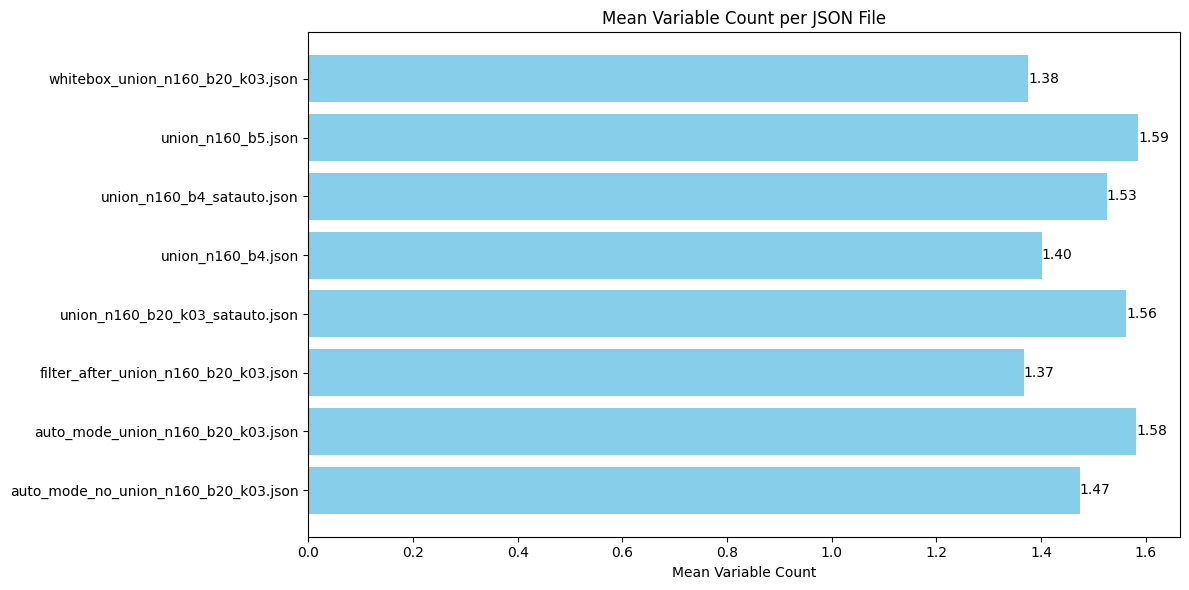

In [5]:
counts("variable_counts_grouped_proof_found.json")

##### All

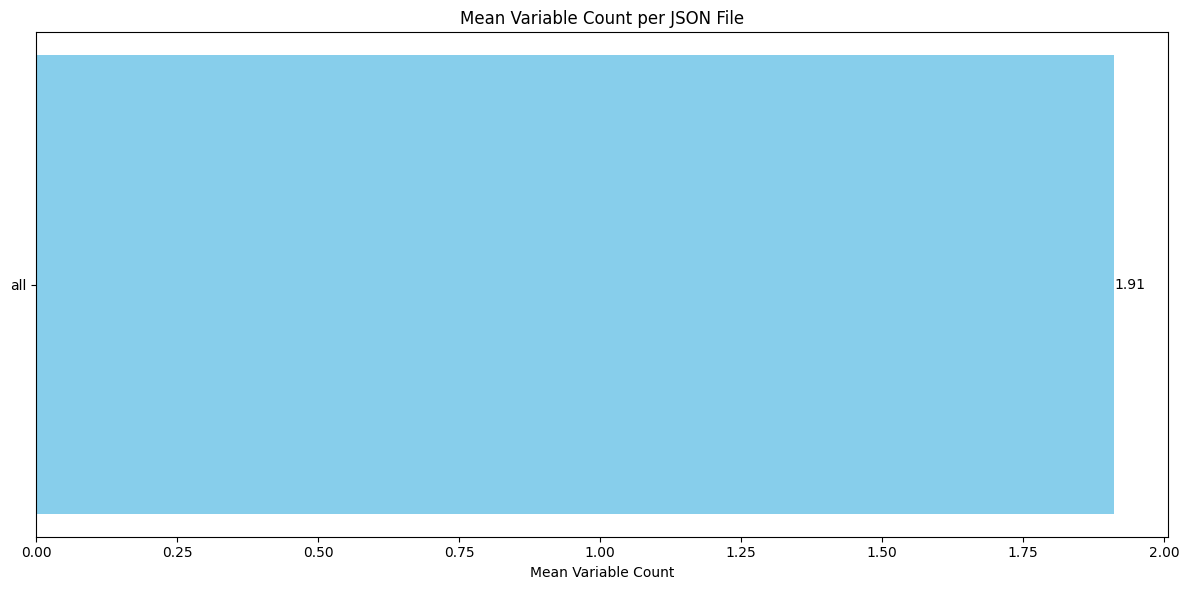

In [6]:
counts("variable_counts_grouped_all.json")

#### Count signs |, &, ?, !, ~

##### Proof Found

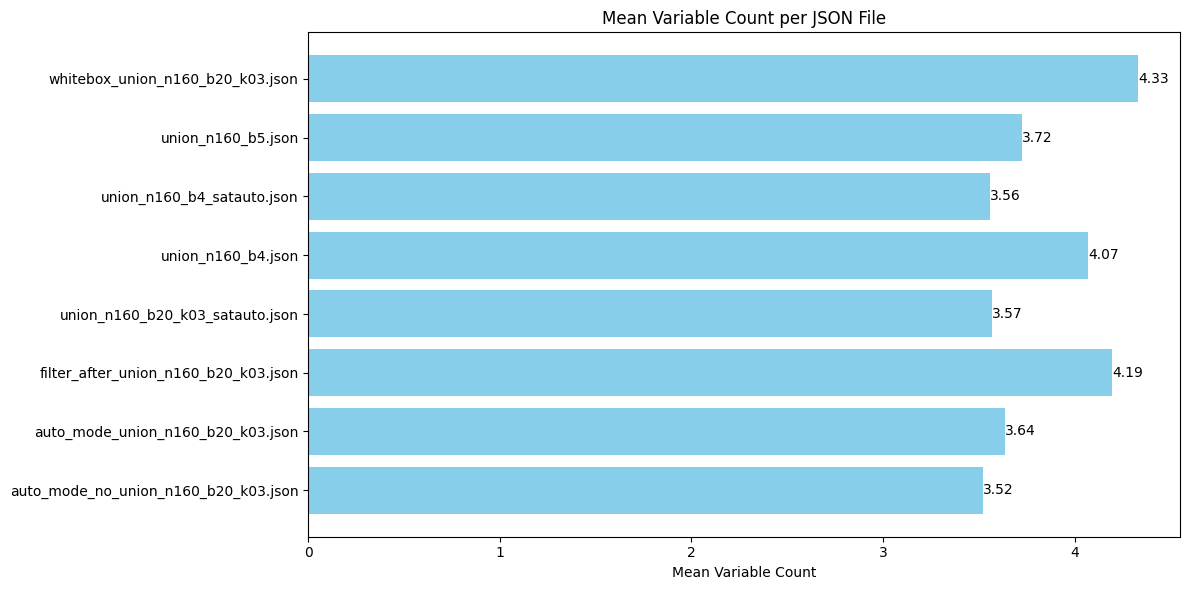

In [7]:
counts("signs_counts_grouped_proof_found.json")

##### All

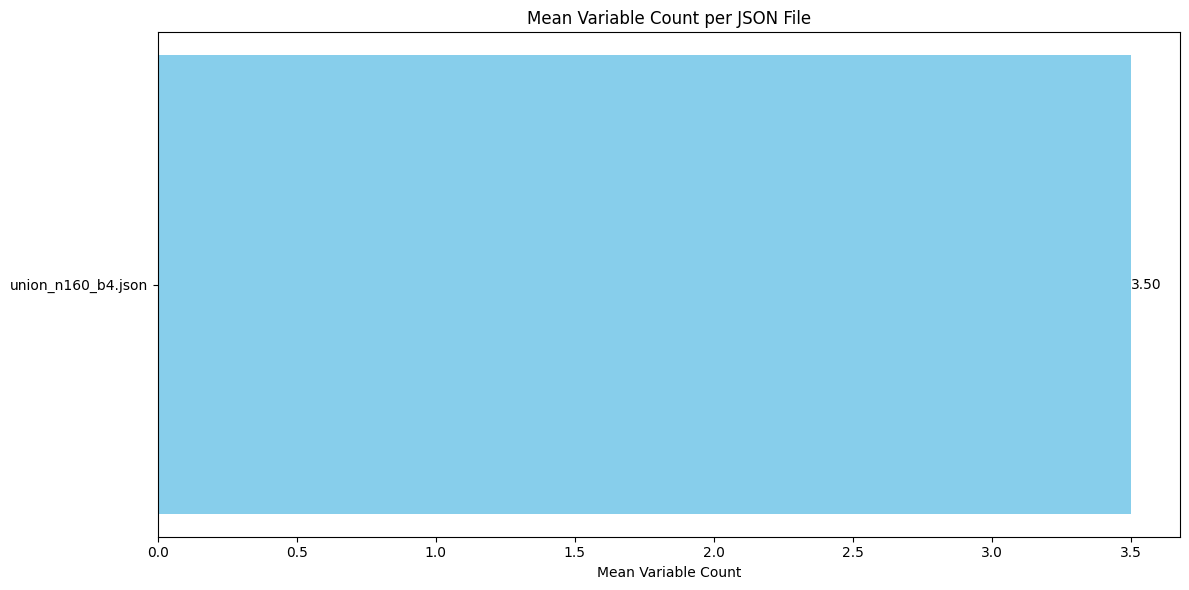

In [8]:
counts("signs_counts_grouped_all.json")

#### Character Count

##### Proof Found

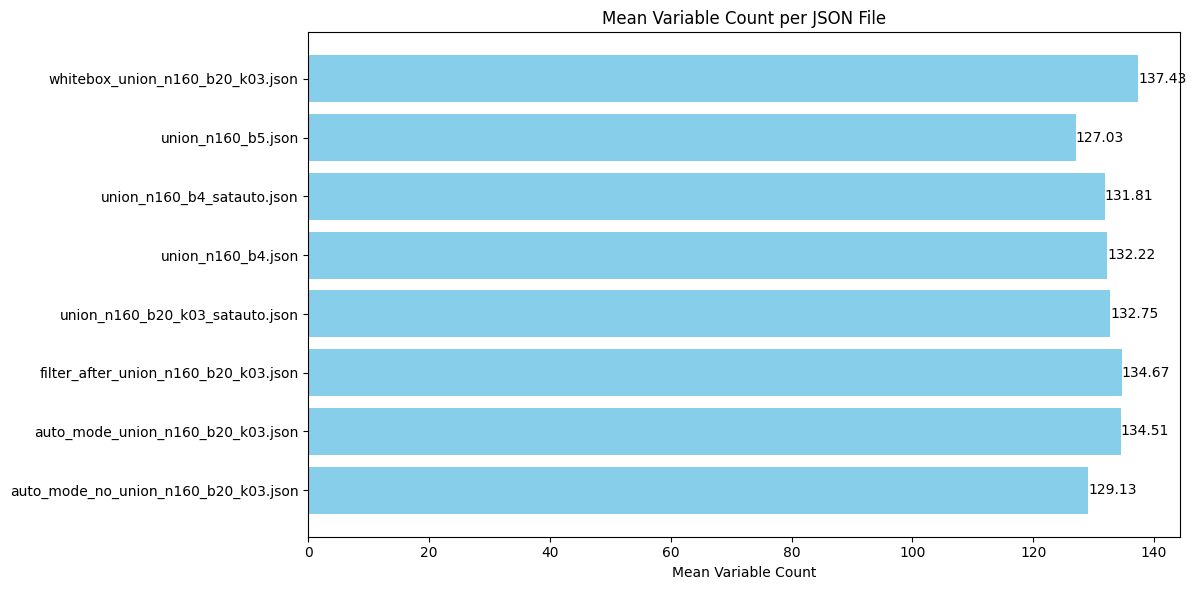

In [10]:
counts("character_counts_grouped_proof_found.json")

##### All

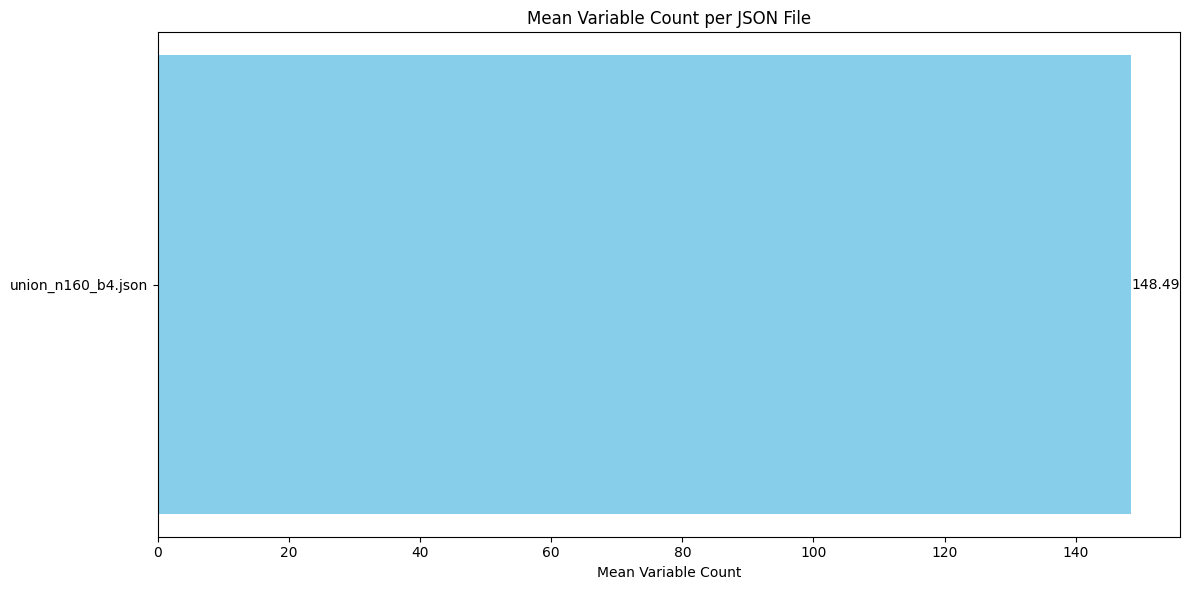

In [9]:
counts("character_counts_grouped_all.json")

Wie oft tritt eine Variable auf - Anzahl der Klauseln zählen in denen die Variable vorkommt  
Neue Fälle für den Union  
Warum kann man besser sein als so ein syntaktischer Solver - sind die Fälle identisch die mehr geschaffen werden? -> Fälle die sich unterscheiden sind spannend  
Zwei TimeOuts nutzen - wie viele Fälle bekommt man mit 2s oder 10s oder 100s  
Schnelligkeit messen wie lange es dauert - ist mir Union schneller?  
Man optimiert gegen den Testsatz mit WhiteBoxProofTest - kann man Axiom künstlich verlängern: alpha impliziert beta wird zu alpha impliziert beta1, beta1 impliziert beta2, beta2 impliziert beta ---> Text verlängern
Kleinerer TimeOut für erstere Studien
Semantische Nähe

Vampire als Gegenmodell zur Validität

Titel: 
- Can semantic similarities of words enhance commen sense reasoning? A case study with prover E and SUMO.
- Buzzwords: Semantic word similarity - commen sense reasoning

Hypthese: durch semantische Nähe geben wir was rein, was E so nicht wissen kann.
